In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import *

# 3.1. 에너지가 E인 입자의 핵융합 충돌 단면적의 해 구하기

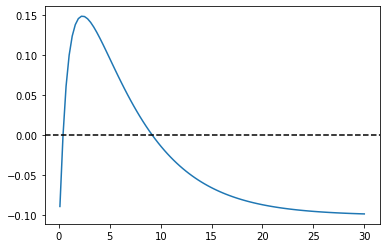

In [ ]:
def collision_area(energy):
  return np.exp((-np.sqrt(2/energy))-(energy/5))-0.1

energy = np.linspace(0.1,30,100)
plt.plot(energy,collision_area(energy))
plt.axhline(0,linestyle='--',color='black')

In [ ]:
tol = 1e-6
a0,b0 = .1,5
a1,b1 = 5,10
n = 0

for a,b in [[a0,b0],[a1,b1]]:
  n += 1
  while True:
    fa = collision_area(a);fb = collision_area(b)
    c = (a*fb-b*fa)/(fb-fa)
    fc = collision_area(c)
    if abs(c-a) < tol: break
    if fa*fc < 0:
      b = c
    else:
      a = c

  print(f'value{n}:{c:.6f}')

value1:0.405251
value2:9.178998


# 3.2. 플랑크 함수

## (1)미분 방정식 관계식 구하기

$\frac{\delta B_{\lambda}}{\delta\lambda}=\frac{1}{\lambda^7}\frac{2hc^2}{k_{B}T}$ $\frac{hce^{hc/\lambda k_{B}T}-5\lambda k_{B}T(e^{hc/\lambda k_{B}T}-1)}{({e^{hc/\lambda k_{B}T}-1})^2}$

## (2)주어진 값에 대해서 파장 구하기

In [ ]:
planck, boltzmann, light = 6.626*10**(-34), 1.381*10**(-23), 2.998*10**8

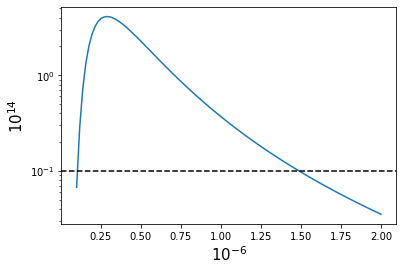

In [ ]:
def planck_func(wavelength,temperature=10**4):
  wavelength = wavelength*10**(-6)
  up = (2*planck*light**2)/(wavelength**5)
  down = np.e**((planck*light)/(wavelength*boltzmann*temperature))-1
  return (up/down)/10**14

wl = np.linspace(0.1,2,100)
plt.plot(wl,planck_func(wl))
plt.axhline(0.1,linestyle='--',color='black')
plt.xlabel('$10^{-6}$',fontsize=15);plt.ylabel('$10^{14}$',fontsize=15)
plt.yscale('log')

In [ ]:
tol = 1e-6
a0,b0 = 1.4,1.6
a1,b1 = 0.1,0.2
n = 0

for a,b in [[a0,b0],[a1,b1]]:
  n += 1  
  while True:
    fa = planck_func(a)-0.1;fb = planck_func(b)-0.1
    c = (a*fb-b*fa)/(fb-fa)
    fc = planck_func(c)-0.1
    if abs(c-a) < tol: break
    if fa*fc < 0:
      b = c
    else:
      a = c

  print(f'value{n}:{c:.6e}')

value1:1.488946e+00
value2:1.044335e-01


# 3.3. 케플러 방정식

x is 0.000000 value:0.000000
x is 0.108331 value:0.660467
x is 0.216662 value:0.947339
x is 0.324992 value:1.144412
x is 0.433323 value:1.300691
x is 0.541654 value:1.433140
x is 0.649985 value:1.549786
x is 0.758315 value:1.655117
x is 0.866646 value:1.751923
x is 0.974977 value:1.842065
x is 1.083308 value:1.926857
x is 1.191639 value:2.007264
x is 1.299969 value:2.084019
x is 1.408300 value:2.157696
x is 1.516631 value:2.228751
x is 1.624962 value:2.297558
x is 1.733292 value:2.364427
x is 1.841623 value:2.429619
x is 1.949954 value:2.493357
x is 2.058285 value:2.555834
x is 2.166616 value:2.617219
x is 2.274946 value:2.677664
x is 2.383277 value:2.737305
x is 2.491608 value:2.796264
x is 2.599939 value:2.854654
x is 2.708270 value:2.912582
x is 2.816600 value:2.970147
x is 2.924931 value:3.027443
x is 3.033262 value:3.084562
x is 3.141593 value:3.141593


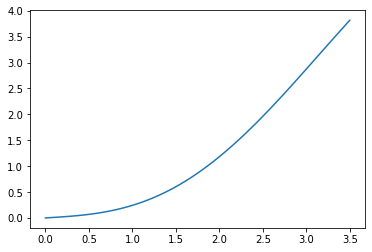

In [ ]:
def kepler_eq(y):
  f = y - 0.9*np.sin(y)
  return f

ylist = np.linspace(0,3.5,100)
plt.plot(ylist,kepler_eq(ylist))
xlist = np.linspace(0,np.pi,30)

tol = 1e-6
a,b = 0,3.5

for x in xlist:
  while True:
    fa = kepler_eq(a) -x;fb = kepler_eq(b) -x
    c = (a*fb-b*fa)/(fb-fa)
    fc = kepler_eq(c) -x
    if abs(c-a) < tol: break
    if fa*fc < 0:
      b = c
    else:
      a = c

  print(f'x is {x:.6f} value:{c:.6f}')

# 3.4. 사하방정식

# 3.5. 강자성체 그래프

$T=\frac{M}{tanh^{-1}M}$

Text(0, 0.5, '$T$')

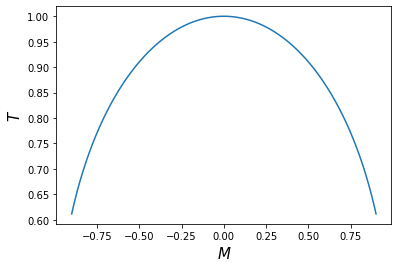

In [ ]:
def magnetism(M):
  return M/np.arctanh(M)

Mlist=np.linspace(-0.9,0.9,1000)
plt.plot(Mlist,magnetism(Mlist))

plt.xlabel('$M$',fontsize=15);plt.ylabel('$T$',fontsize=15)

# 3.6. 라그랑주 포인트

# 3.7. 르장드르 다항식

[-0.973906528517172,
 -0.865063366688985,
 -0.679409568299024,
 -0.433395394129247,
 -0.148874338981631,
 0.148874338981631,
 0.433395394129247,
 0.679409568299024,
 0.865063366688985,
 0.973906528517172]

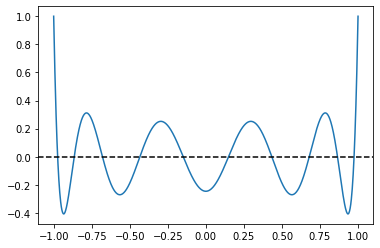

In [ ]:
def legendre(x):
  func = (1/256)*(46189*x**10-109395*x**8+90090*x**6-30030*x**4+3465*x**2-63)
  return func

xlist = np.linspace(-1,1,1000)
x=Symbol('x')

plt.plot(xlist,legendre(xlist))
plt.axhline(0,linestyle='--',color='black')

solve(legendre(x))

# 3.8. 비선형 연립방정식

$y=-\frac{2x+5}{1-x}$ 와 $y=\ln2x$로 정리할 수 있다

$2x+5=(x-1)\ln2x$ 형태로 변형이 된다

x value:0.003292
y value:-5.023120


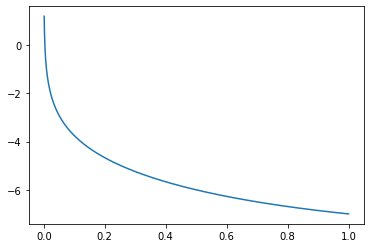

In [ ]:
def func(x):
  return (x-1)*np.log(2*x)-2*x-5

xlist = np.linspace(.001,1,1000)

plt.plot(xlist,func(xlist))

tol = 1e-6
a,b = 0.001,0.1

while True:
  fa = func(a);fb = func(b)
  c = (a*fb-b*fa)/(fb-fa)
  fc = func(c)
  if abs(c-a) < tol: break
  if fa*fc < 0:
    b = c
  else:
    a = c

print(f'x value:{c:.6f}')
print(f'y value:{np.log(2*c):.6f}')